In [30]:
#importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

%matplotlib inline 
pd.set_option('display.max_columns', None) #best practice to view all columns later (no dots in middle)


In [31]:
url = '/Users/debbie/Downloads/amz_uk_price_prediction_dataset.csv'
data = pd.read_csv(url)
df = data.copy()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.shape

In [ ]:
df.isnull().sum() #checking for empty values

In [ ]:
df.duplicated().sum() #checking for duplicates

In [ ]:
df.eq("").sum() #checking for empty strings

# Part 1
## Frequency Tables

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?

### Frequncy table using value_counts()

In [32]:
frequency_table =  df.category.value_counts()
frequency_table.sample(5)

category
Action Cameras                    1697
Mobile Phone Accessories           259
Kitchen Storage & Organisation    1428
Ski Goggles                        256
Toy Advent Calendars              9396
Name: count, dtype: int64

In [33]:
proportion_table = df.category.value_counts(normalize=True).round(2)
proportion_table.head()

category
Sports & Outdoors                         0.34
Beauty                                    0.01
Handmade Clothing, Shoes & Accessories    0.01
Bath & Body                               0.01
Birthday Gifts                            0.01
Name: proportion, dtype: float64

In [34]:
df2 = pd.concat([frequency_table, proportion_table], axis=1)
df2.sample(5)

,count,proportion
category,,
Mobile Phone Accessories,259,0.0
Hobbies,9174,0.0
Wearable Technology,8906,0.0
Motorbike Exhaust & Exhaust Systems,258,0.0
Packaging & Shipping Supplies,257,0.0


In [ ]:
df2.columns

In [35]:
df2.columns = ['absolute_frequency', 'relative_frequency']

In [ ]:
df2.columns

In [36]:
total_absolute = frequency_table.sum()
total_relative = proportion_table.sum()

In [37]:
total_row = pd.DataFrame({
    'absolute_frequency': [total_absolute],
    'relative_frequency': [total_relative]
}, index=['Total'])
total_row

,absolute_frequency,relative_frequency
Total,2443651,0.54


In [ ]:
type(total_row)

In [38]:
frequency_table = pd.concat([df2,total_row], axis=0)
frequency_table.head()

,absolute_frequency,relative_frequency
Sports & Outdoors,836265,0.34
Beauty,19312,0.01
"Handmade Clothing, Shoes & Accessories",19229,0.01
Bath & Body,19092,0.01
Birthday Gifts,18978,0.01


In [39]:
print(f"The top 5 most listed product categories are {', '.join(df2.index[:5].astype(str))}")

The top 5 most listed product categories are Sports & Outdoors, Beauty, Handmade Clothing, Shoes & Accessories, Bath & Body, Birthday Gifts


## Visualization

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?


In [40]:
df2 = df2.reset_index()
df2.head()

,category,absolute_frequency,relative_frequency
0,Sports & Outdoors,836265,0.34
1,Beauty,19312,0.01
2,"Handmade Clothing, Shoes & Accessories",19229,0.01
3,Bath & Body,19092,0.01
4,Birthday Gifts,18978,0.01


/var/folders/pm/ddtx28cd2hn37jlq10mrtz700000gn/T/ipykernel_44556/4190701958.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


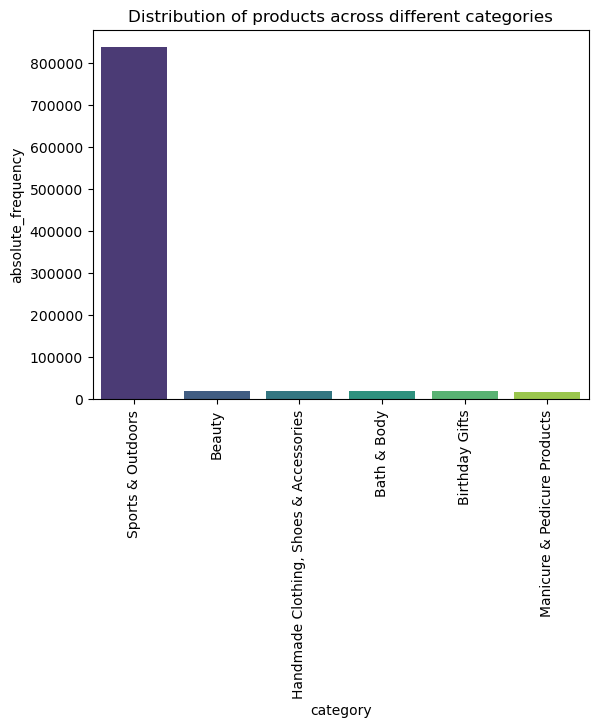

In [48]:
categorytoshow = 6
sns.barplot(
    x='category',
    y='absolute_frequency',
    data=df2.head(categorytoshow),
    palette='viridis',
)
plt.xticks(rotation=90)
plt.title('Distribution of products across different categories')
plt.show()

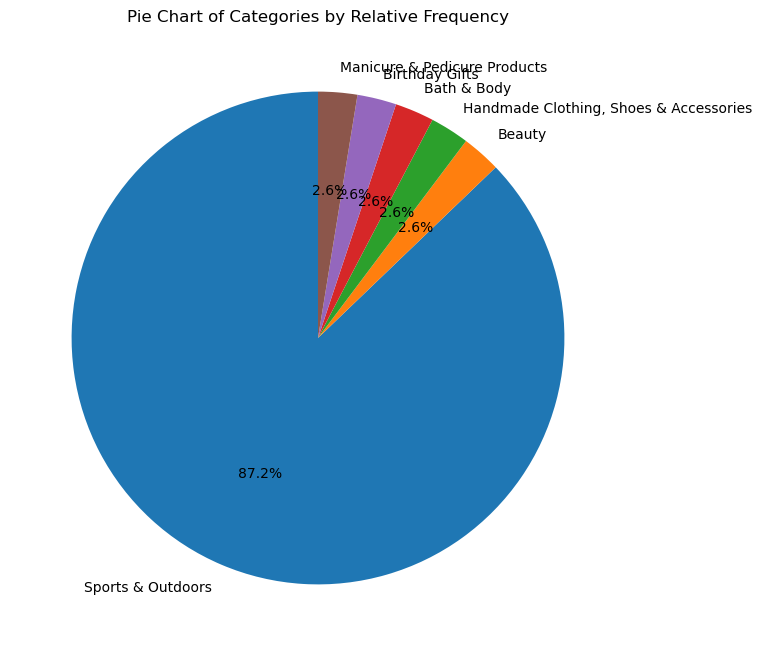

In [49]:
plt.figure(figsize=(8, 8))
plt.pie(df2['relative_frequency'][:categorytoshow], labels=df2['category'][:categorytoshow], autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Pie Chart of Categories by Relative Frequency')

# Display the plot
plt.show()

THe Sports & Outdoors category dominates the listing.

# Part 2: Delving into Product Pricing
###Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?

In [ ]:
df.groupby("category")["price"].agg(['mean', 'median']) # mean and median price per category

,mean,median,min,max
category,,,,
3D Printers,1018.036129,319.00,5.99,12999.00
3D Printing & Scanning,99.909599,36.86,1.94,5448.93
Abrasive & Finishing Products,15.801760,10.49,2.25,150.24
Action Cameras,135.418598,60.77,2.59,2499.00
Adapters,8.750197,7.05,1.99,67.18
...,...,...,...,...
Wind Instruments,391.590480,126.79,3.00,9662.10
Window Treatments,20.668326,17.99,3.99,129.99
Women,22.262394,16.49,1.54,259.00


In [59]:
mean = df["price"].mean()
median = df["price"].median()
mode = statistics.mode(df["price"])
print(f"The mean for the product price is {mean:.2f}, the median is {median:.2f} and the mode is {mode:.2f} ")


The mean for the product price is 89.24, the median is 19.09 and the mode is 9.99 


In [60]:
print(f"The average price point for the products list is {mean:.2f}. The most common price point is {mode:.2f}. The mean is highly influenced by expensive\
 outliers. The mode is not so influenced by expensive outliers")

The average price point for the products list is 89.24. The most common price point is 9.99. The mean is highly influenced by expensive outliers. The mode is not so influenced by expensive outliers


### Measures of Dispersion:
Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?


In [61]:
var = df["price"].var()
std = df["price"].std()
range = df["price"].max() - df["price"].min()
IQR = df["price"].quantile(0.75) - df["price"].quantile(0.25)
print(f"The variance is {var:.2f}, the standard deviation is {std:.2f}. The range is {range:.2f} and the interquartile range is {IQR:.2f}")


The variance is 119445.49, the standard deviation is 345.61. The range is 100000.00 and the interquartile range is 36.00


#### Visualizations:
Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved.

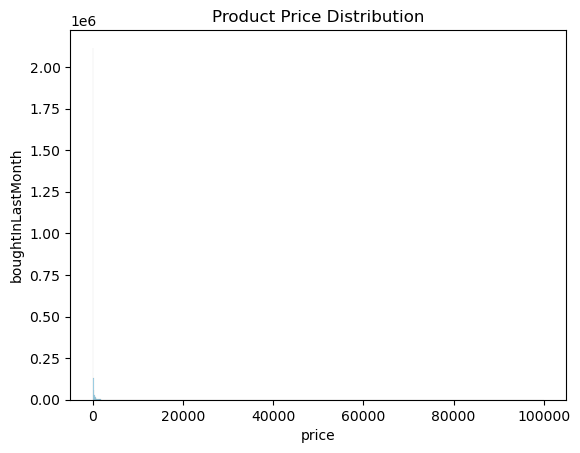

In [69]:
# Plot histogram using seaborn
sns.histplot(df['price'], bins=1000, kde=False, color='skyblue')

# Add labels and title
plt.xlabel('price')
plt.ylabel('boughtInLastMonth')
plt.title('Product Price Distribution')

# Show plot
plt.show()

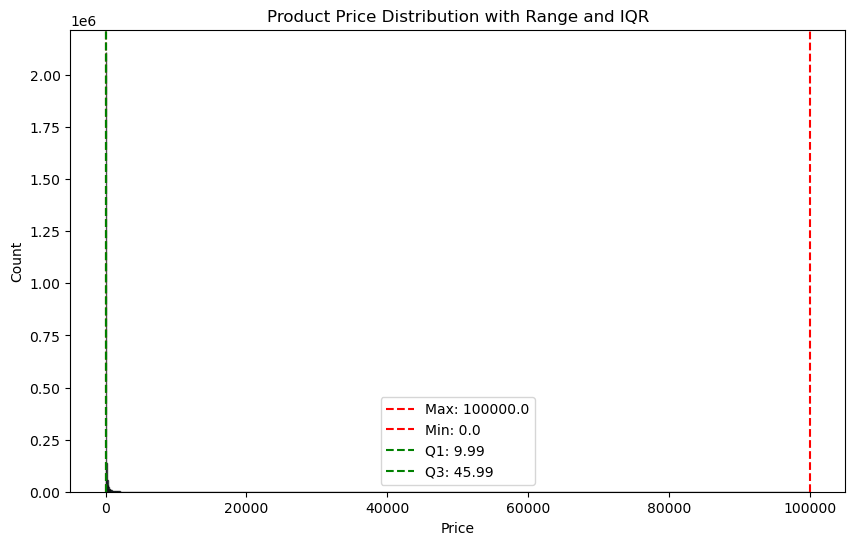

In [72]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)

# Plot histogram with specified bins
plt.figure(figsize=(10, 6))

# Group prices into bins and plot histogram
plt.hist(df['price'], bins=1005, color='skyblue', edgecolor='black', alpha=0.7)

# Add lines for range and IQR indicators
plt.axvline(df['price'].max(), color='r', linestyle='--', label=f'Max: {df['price'].max()}')
plt.axvline(df['price'].min(), color='r', linestyle='--', label=f'Min: {df['price'].min()}')
plt.axvline(Q1, color='g', linestyle='--', label=f'Q1: {Q1}')
plt.axvline(Q3, color='g', linestyle='--', label=f'Q3: {Q3}')

# Customize labels, title, and legend
plt.xlabel('Price')
plt.ylabel('Count')
plt.title('Product Price Distribution with Range and IQR')
plt.legend()

# Display the plot
plt.show()

The IQR is 36 so 50% of the products are 36 Euro apart. It is difficult to visualise the price ranges due to the outliers. An idea could be to delete the outliers from the dataset.

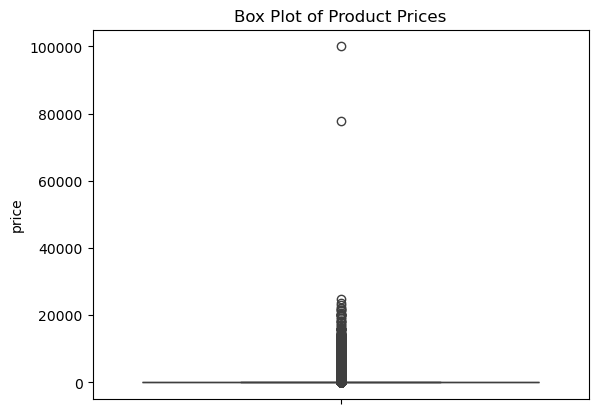

In [73]:
sns.boxplot(y=df['price'])
plt.title('Box Plot of Product Prices')
plt.ylabel('price')
plt.show()

Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [79]:
max_index = df["price"].idxmax()
max_price_product = df.loc[max_index]
second_highest = df["price"].nlargest(2).idxmin()
second_product = df.loc[second_highest]
print(f"The highest product is '{max_price_product["title"]}' and the second highest product is '{second_product["title"]}'")

The highest product is 'HB FBA Test Treadmill' and the second highest product is 'Générique L.A 350° - I5 11400F - RTX 3050 8G - 16GB RAM - NVME 1TB'


# Part 3: Unpacking Product Ratings

### Measures of Centrality:

    Calculate the mean, median, and mode for the rating of products.
    How do customers generally rate products? Is there a common trend?



In [85]:
r_mean = df["stars"].mean()
r_median = df["stars"].median()
r_mode = statistics.mode(df["stars"])
print(f"The mean for the product rating is {r_mean:.2f}, the median is {r_median} and the mode is {r_mode} ")


The mean for the product rating is 2.15, the median is 0.0 and the mode is 0.0 


The feedback does not seems consistent, a lot of products seems to have 0 rating.

### Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?


In [88]:
r_var = df["stars"].var()
r_std = df["stars"].std()
r_range = df["stars"].max() - df["stars"].min()
r_IQR = df["stars"].quantile(0.75) - df["stars"].quantile(0.25)
print(f"The variance is {r_var:.2f}, the standard deviation is {r_std:.2f}. The range is {r_range:.2f} and the interquartile range is {r_IQR:.2f}")


The variance is 4.82, the standard deviation is 2.19. The range is 5.00 and the interquartile range is 4.40


THe ratings do not seems to be consistent but 50% of the ratings range 4.40

### Shape of the Distribution:

    Calculate the skewness and kurtosis for the rating column.
    Are the ratings normally distributed, or do they lean towards higher or lower values?



In [94]:
# skewness --> skew()
skew = df["stars"].skew().round(2)
# kurtosis --> kurtosis()
kurt = df["stars"].kurtosis().round(2)
print(f"skewness of rating is {skew}. kurtosis of rating is {kurt}")

skewness of rating is 0.08. kurtosis of rating is -1.93


No. this is not a normal distribution.They lean towards lower/empty values.

Kurtosis < 0: The distribution for rating is platykurtic. It has thinner tails and a flatter peak than the normal distribution, indicating fewer extreme values than expected in a normal distribution.


Skewness > 0: The distributionf or rating is positively skewed (or right-skewed), meaning there is a longer tail on the right side of the distribution. The mass of the distribution is concentrated on the left of the figure.

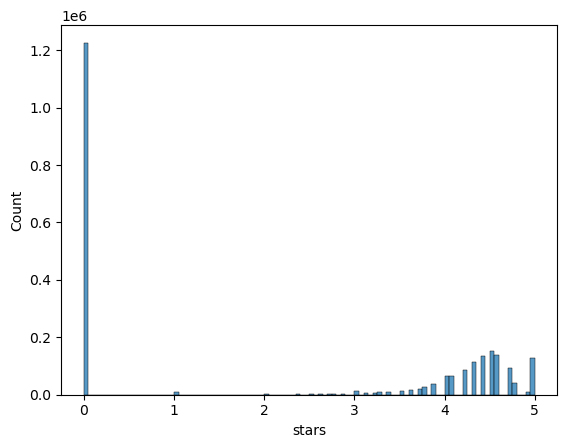

In [91]:
sns.histplot(df['stars'], bins=100)
plt.show()

The rating most common is 0.